In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('data_train_test.csv')
a = data['patient_manual_class']
a = a.replace(np.nan, 0)
a = a.replace(2, 0)
data['patient_manual_class'] = a
data = data.dropna()

In [5]:
from sklearn.model_selection import train_test_split
num_features = ['abs', 'std', 'norm_abs', 'mean', 'sd', 'median', 'mode', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'kx2', 'n_pic']
cat_features = ['patient_ds', 'rec_date_time']
X_train, X_test, y_train, y_test = train_test_split(data[num_features], data['patient_manual_class'], test_size=0.2, shuffle=False)

In [10]:
df = pd.DataFrame(data[num_features])

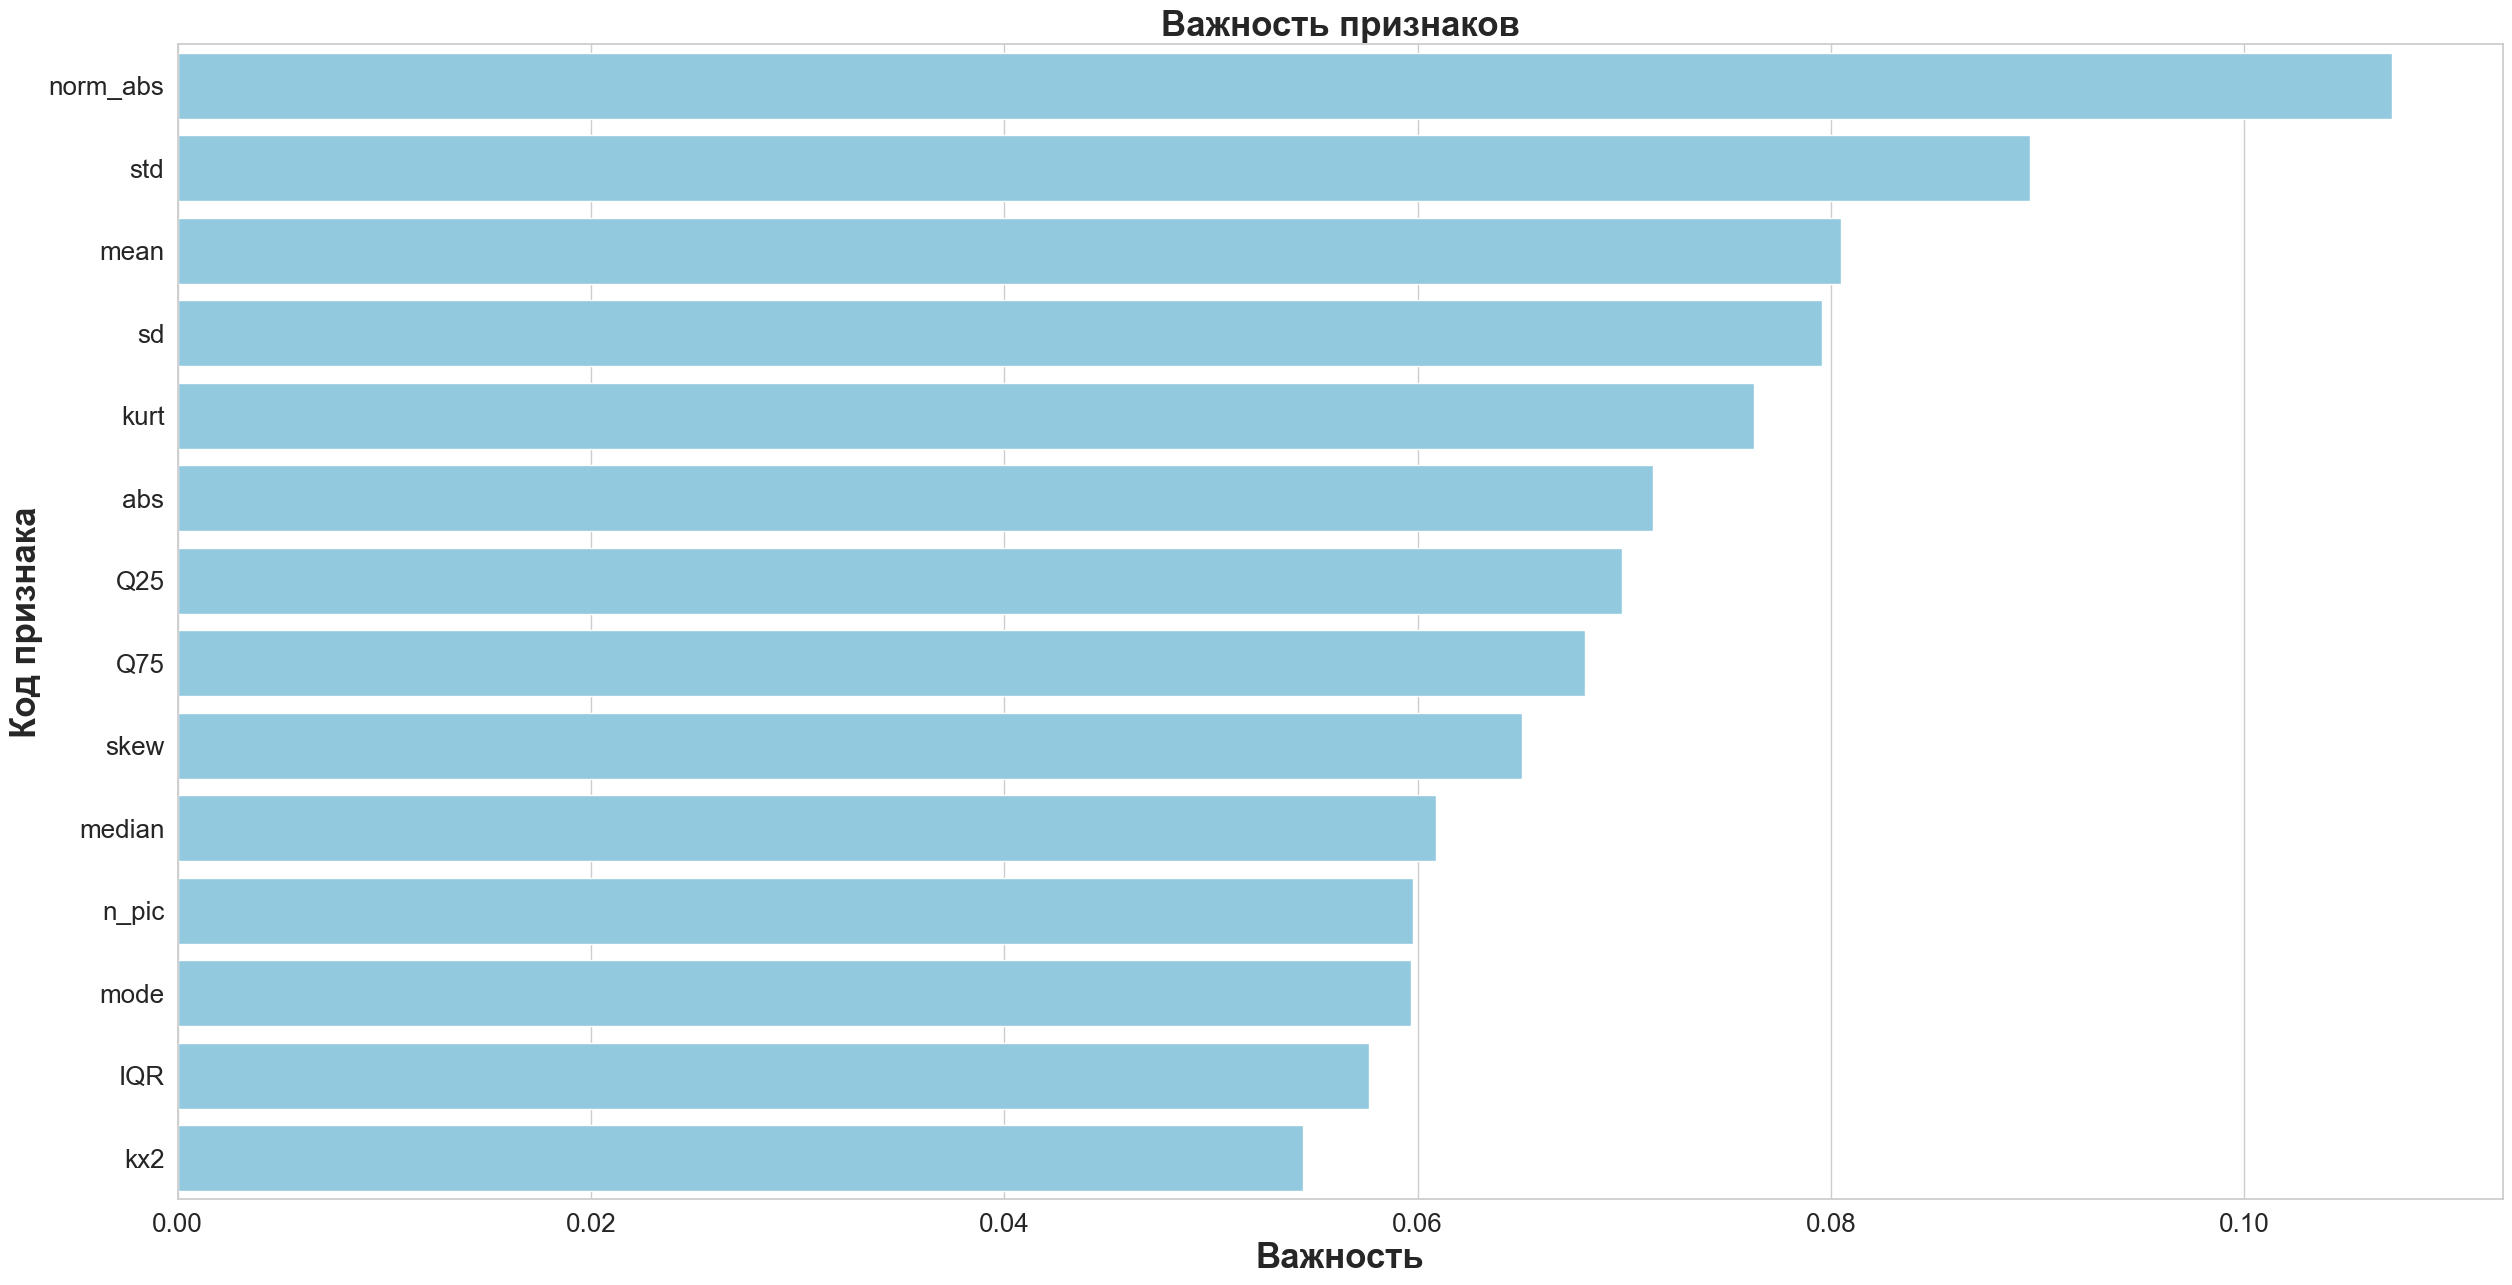

None

,Features,Gini-Importance
0,norm_abs,0.107145
1,std,0.089629
2,mean,0.080466
3,sd,0.079547
4,kurt,0.076280
5,abs,0.071401
6,Q25,0.069893
7,Q75,0.068123
8,skew,0.065029
9,median,0.060896


In [11]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
model_RF = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
feats = {}
for feature, importance in zip(df.columns, model_RF.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Код признака', fontsize=25, weight = 'bold')
plt.title('Важность признаков', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Наиболее важный признак для выборки X_train - norm_abs - среднее значение после нормирования

In [25]:
import pickle
data = model_RF
with open('model_RF_before_comparing.pickle', 'wb') as f:
  pickle.dump(data, f)

In [12]:
prediction = model_RF.predict(X_test)
from sklearn import metrics
print("Точность:", metrics.accuracy_score(y_test, prediction))

Точность: 0.8222222222222222


In [14]:
from sklearn.metrics import mean_squared_error
print("Ошибка MSE:", mean_squared_error(y_test, prediction))

Ошибка MSE: 0.17777777777777778


In [16]:
from math import sqrt
print("Ошибка RMSE:", sqrt(mean_squared_error(y_test, prediction)))

Ошибка RMSE: 0.4216370213557839


In [24]:
data_test = pd.read_csv('data_test.csv')
df_test = pd.DataFrame(data_test[num_features])
df_test = df_test.dropna()
X_test = df_test.iloc[:,:]
prediction = model_RF.predict(X_test)
df_test["fistulas_kind"] = prediction #добавляем в наш НД расчетное значение
#пишем в файл результат, колонка fistulas_kind:
df_test.to_csv("data_test_model_RF_trial.csv", index=False)
print("Результаты классификации модели, построенной по методу случайного леса выгружены в файл data_test_model_RF_trial.csv")

Результаты классификации модели, построенной по методу случайного леса выгружены в файл data_test_model_RF_trial.csv


In [22]:
print("Виды АВФ в результате классификации методом случайного леса: ", df_test.fistulas_kind.unique())
print("0 - плохая, 1 - хорошая")
print("\n", df_test.groupby('fistulas_kind').size())

Виды АВФ в результате классификации методом случайного леса:  [0. 1.]
0 - плохая, 1 - хорошая

 fistulas_kind
0.0     56
1.0    178
dtype: int64
